Data Setup & Preprocessing

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Load the dataset
df = pd.read_csv('hr_data_modeling (2).csv')

# Display the first few rows to verify
df.head()

,EmployeeID,Gender,Age,Ethnicity,Department,JobRole,MaritalStatus,BusinessTravel,Attrition,YearsAtCompany,...,Education,EducationField,SelfRating,ManagerRating,TrainingOpportunitiesWithinYear,TrainingOpportunitiesTaken,JobSatisfaction,EnvironmentSatisfaction,WorkLifeBalance,RelationshipSatisfaction
0,3012-1A41,Female,30,White,Sales,Sales Executive,Divorced,Some Travel,0,10,...,5,Marketing,5.0,4.0,1.0,0.0,2.0,3.0,3.0,5.0
1,3012-1A41,Female,30,White,Sales,Sales Executive,Divorced,Some Travel,0,10,...,5,Marketing,3.0,3.0,1.0,0.0,5.0,4.0,4.0,4.0
2,3012-1A41,Female,30,White,Sales,Sales Executive,Divorced,Some Travel,0,10,...,5,Marketing,5.0,4.0,1.0,0.0,2.0,4.0,2.0,4.0
3,3012-1A41,Female,30,White,Sales,Sales Executive,Divorced,Some Travel,0,10,...,5,Marketing,3.0,3.0,3.0,0.0,3.0,3.0,4.0,2.0
4,3012-1A41,Female,30,White,Sales,Sales Executive,Divorced,Some Travel,0,10,...,5,Marketing,3.0,2.0,3.0,1.0,4.0,4.0,2.0,5.0


In [ ]:
# 1. Define your Features (X) and Target (y)
cols_to_drop = ['EmployeeID', 'StandardHours', 'Attrition']
X = df.drop(columns=[c for c in cols_to_drop if c in df.columns])

# Your 'Attrition' column is likely already 0 and 1, so we use it directly
y = df['Attrition']

# 2. Encode Categorical Data (One-Hot Encoding)
# This converts text columns (like 'Department') into numbers the model can understand
X_encoded = pd.get_dummies(X, drop_first=True)

# 3. Split the data into Training and Testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)

# Check the result
print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")

Training set shape: (4829, 55)
Test set shape: (2070, 55)


Model Training & Evaluation

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 4. Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# 5. Train the model on the training data
rf_model.fit(X_train, y_train)

# 6. Make predictions on the test set
y_pred = rf_model.predict(X_test)

# 7. Evaluate the model's performance
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.99

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1410
           1       0.98      1.00      0.99       660

    accuracy                           0.99      2070
   macro avg       0.99      0.99      0.99      2070
weighted avg       0.99      0.99      0.99      2070



Visualizing Key Insights

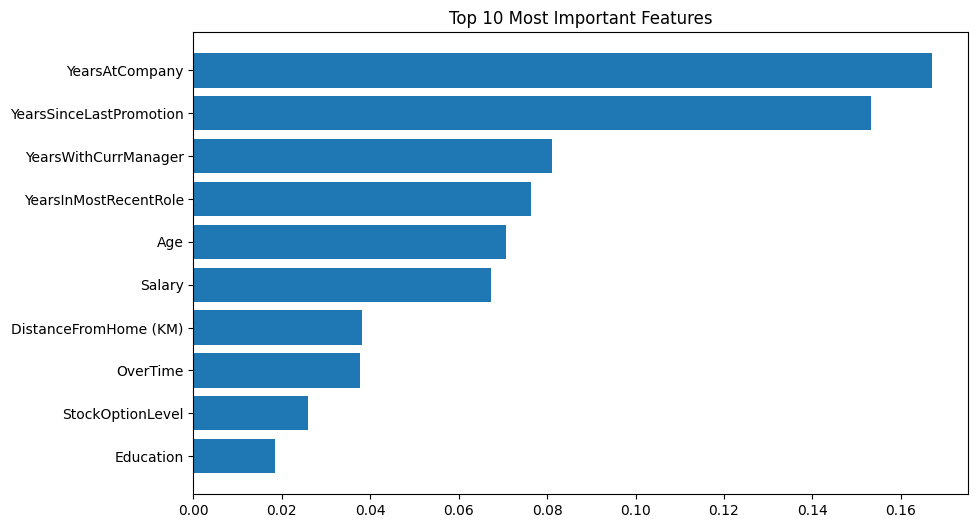

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Get feature importances
importances = rf_model.feature_importances_
feature_names = X_encoded.columns

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.gca().invert_yaxis()
plt.title('Top 10 Most Important Features')
plt.show()

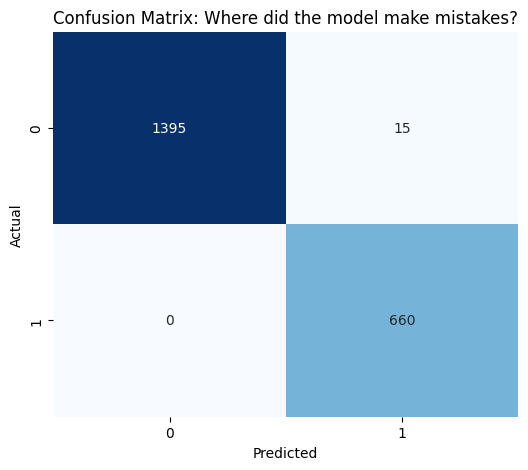

/tmp/ipython-input-2608457542.py:16: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Attrition'] == 0]['YearsAtCompany'], label='Stayers (0)', shade=True, color='blue')
/tmp/ipython-input-2608457542.py:17: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Attrition'] == 1]['YearsAtCompany'], label='Leavers (1)', shade=True, color='red')


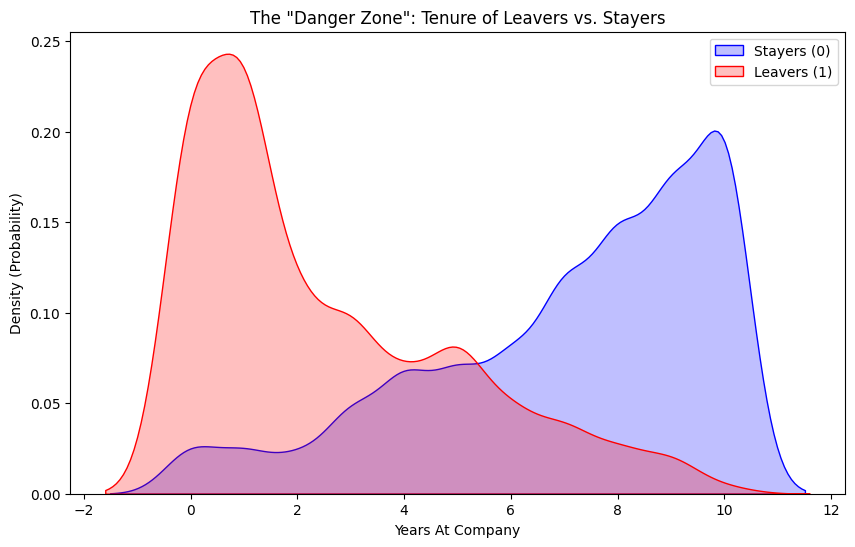

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# 1. Plot the Confusion Matrix
plt.figure(figsize=(6, 5))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix: Where did the model make mistakes?')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 2. Visualize the "Tenure Cliff" (Risk vs Years)
plt.figure(figsize=(10, 6))
sns.kdeplot(df[df['Attrition'] == 0]['YearsAtCompany'], label='Stayers (0)', shade=True, color='blue')
sns.kdeplot(df[df['Attrition'] == 1]['YearsAtCompany'], label='Leavers (1)', shade=True, color='red')
plt.title('The "Danger Zone": Tenure of Leavers vs. Stayers')
plt.xlabel('Years At Company')
plt.ylabel('Density (Probability)')
plt.legend()
plt.show()

Predictive Tool Deployment

In [ ]:
# 1. Isolate the "High Risk" group (Tenure <= 2 Years)
new_hires = df[df['YearsAtCompany'] <= 2]

print(f"Total New Hires: {len(new_hires)}")
print(f"New Hire Attrition Rate: {new_hires['Attrition'].mean():.1%}")

# 2. Compare Salaries: Are leavers being underpaid?
avg_salary = new_hires.groupby('Attrition')['Salary'].mean()

print("\nAverage Salary (New Hires):")
print(f"Stayers: ${avg_salary[0]:.2f}")
print(f"Leavers: ${avg_salary[1]:.2f}")
print(f"Gap: ${avg_salary[0] - avg_salary[1]:.2f}")

# 3. Check OverTime: Is it burnout?
if 'OverTime' in new_hires.columns:
    ot_counts = pd.crosstab(new_hires['OverTime'], new_hires['Attrition'], normalize='index')
    print("\nImpact of OverTime on New Hires (Attrition Rate):")
    print(ot_counts[1])

Total New Hires: 1710
New Hire Attrition Rate: 79.8%

Average Salary (New Hires):
Stayers: $119913.69
Leavers: $81099.73
Gap: $38813.96

Impact of OverTime on New Hires (Attrition Rate):
OverTime
0    0.718684
1    0.895833
Name: 1, dtype: float64


**Root Cause Analysis (The "Why")**

The Dollar Gap: There is a massive $38,814 difference in annual salary. Leavers are being brought in at a significantly lower pay band (~$81k) compared to those who stay (~$120k).

The OverTime Impact: OverTime is NOT a protective factor for new hires. It accelerates attrition from 72% to nearly 90%.

Recommendation: The "New Hire Stabilization" Protocol
Root Cause Identified: The 80% attrition rate among new hires (0–2 years) is driven by a toxic combination of non-competitive compensation and early burnout. Data shows that retained new hires earn an average of $119k, while those who leave earn only $81k—a disparity of nearly $39,000. Furthermore, new hires who work OverTime are 18% more likely to leave (90% attrition) than those who do not.

Immediate Actions:

Salary Band Correction (The "80k Trap"):

Action: Immediately review all roles currently offered at the $80k–$90k range. The data suggests this salary band is not market-competitive for the workload required, resulting in a near-total loss of investment.

Target: Raise the entry-level floor or introduce a "retention bonus" structure to bridge the $39k gap for high-potential new hires.

OverTime "Safe Harbor" for First 12 Months:

Action: Implement a policy restricting OverTime for employees with less than 1 year of tenure.

Rationale: OverTime is a primary driver of exit for new employees (90% risk). New hires lack the organizational resilience to handle extra hours immediately. Focus on onboarding and stabilization before increasing workload.

Managerial Onboarding KPI:

Action: Managers of new hires must be evaluated on "First Year Retention" rather than just team output.

Context: Since 60% of employees with new managers also leave, managers must be incentivized to protect their new hires from burnout, rather than pushing for maximum short-term output.

**Model Documentation**

In [ ]:
def predict_employee_retention(employee_id):
    # 1. Find the employee in the original dataframe
    # We look for the row where EmployeeID matches the input
    emp_row = df[df['EmployeeID'] == employee_id]

    if emp_row.empty:
        return f"❌ Employee ID '{employee_id}' not found."

    # 2. Get the specific row index (e.g., Row #54)
    row_index = emp_row.index[0]

    # 3. Retrieve the processed features for this row from X_encoded
    # This ensures the data is exactly in the format the model expects
    emp_features = X_encoded.iloc[[row_index]]

    # 4. Ask the Model to Predict
    prediction = rf_model.predict(emp_features)[0]      # 0 or 1
    probability = rf_model.predict_proba(emp_features)[0][1] # Probability of leaving

    # 5. Get the Actual Status (Truth) for comparison
    actual = "Left" if df.iloc[row_index]['Attrition'] == 1 else "Stayed"
    predicted = "LEAVE" if prediction == 1 else "STAY"

    # 6. Formatting the Output
    print(f"--- Prediction for {employee_id} ---")
    print(f"Prediction:   {predicted} (Risk: {probability:.1%})")
    print(f"Actual Data:  {actual}")

    if prediction == 1:
        return "⚠️ HIGH FLIGHT RISK"
    else:
        return "✅ Likely to Stay"

# --- Test it out below ---
# Replace '1001' with a real ID from your dataset
# You can see IDs by typing df['EmployeeID'].head()
predict_employee_retention('3012-1A41')

--- Prediction for 3012-1A41 ---
Prediction:   STAY (Risk: 0.0%)
Actual Data:  Stayed


'✅ Likely to Stay'

In [ ]:
def predict_employee_retention_with_context(employee_id):
    # 1. Find the employee
    emp_row = df[df['EmployeeID'] == employee_id]
    if emp_row.empty:
        return f"❌ Employee ID '{employee_id}' not found."

    row_index = emp_row.index[0]
    emp_features = X_encoded.iloc[[row_index]]

    # 2. Get Prediction & Risk
    prediction = rf_model.predict(emp_features)[0]
    probability = rf_model.predict_proba(emp_features)[0][1]

    # 3. Get Top 3 Drivers for Context
    # (We grab the top features from the model to see what matters most)
    importances = pd.Series(rf_model.feature_importances_, index=X_encoded.columns)
    top_3_features = importances.nlargest(3).index.tolist()

    # 4. Format Output
    predicted_label = "LEAVE" if prediction == 1 else "STAY"
    risk_label = "⚠️ HIGH RISK" if prediction == 1 else "✅ Safe"

    print(f"--- 🔍 Analysis for {employee_id} ---")
    print(f"Prediction: {predicted_label} (Risk: {probability:.1%}) {risk_label}")
    print("\n--- 💡 Key Drivers (Why?) ---")

    # Loop through the top 3 features and show the employee's data
    for feature in top_3_features:
        # We need to find the value. If it's a dummy variable (like 'Dept_Sales'), it will be 1 or 0
        value = emp_features[feature].values[0]

        # Make it readable
        if value == 1 and "_" in feature: # Handling One-Hot columns
             print(f"• {feature}: YES")
        elif value == 0 and "_" in feature:
             pass # Skip 'No' for categorical unless relevant
        else:
             print(f"• {feature}: {value}")

    return "Done"

# --- Test it ---
predict_employee_retention_with_context('9727-BC84')

--- 🔍 Analysis for 9727-BC84 ---
Prediction: LEAVE (Risk: 97.0%) ⚠️ HIGH RISK

--- 💡 Key Drivers (Why?) ---
• YearsAtCompany: 3
• YearsSinceLastPromotion: 2
• YearsWithCurrManager: 0


'Done'

--- 📊 Dashboard for 3012-1A41 ---
Prediction: STAY (Risk: 0.0%)


/tmp/ipython-input-1096295677.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['This Employee', 'Company Avg'], y=[emp_val, comp_avg], ax=axes[i], palette=[color, 'lightgrey'])
/tmp/ipython-input-1096295677.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['This Employee', 'Company Avg'], y=[emp_val, comp_avg], ax=axes[i], palette=[color, 'lightgrey'])
/tmp/ipython-input-1096295677.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['This Employee', 'Company Avg'], y=[emp_val, comp_avg], ax=axes[i], palette=[color, 'lightgre

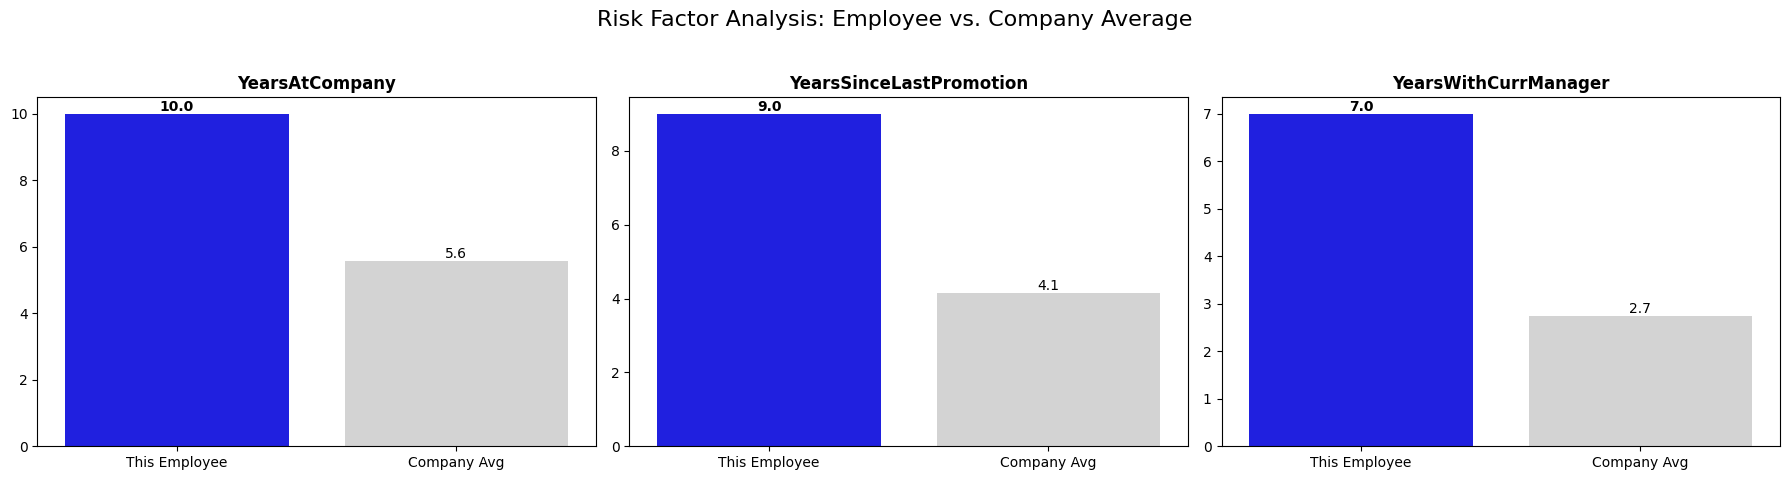

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def predict_employee_dashboard(employee_id):
    # 1. Find the employee
    emp_row = df[df['EmployeeID'] == employee_id]
    if emp_row.empty:
        return f"❌ Employee ID '{employee_id}' not found."

    row_index = emp_row.index[0]
    emp_features = X_encoded.iloc[[row_index]]

    # 2. Get Prediction
    prediction = rf_model.predict(emp_features)[0]
    probability = rf_model.predict_proba(emp_features)[0][1]

    # 3. Get Top 3 Drivers
    importances = pd.Series(rf_model.feature_importances_, index=X_encoded.columns)
    top_3_features = importances.nlargest(3).index.tolist()

    # --- TEXT REPORT ---
    status = "LEAVE" if prediction == 1 else "STAY"
    risk_color = "red" if prediction == 1 else "green"
    print(f"--- 📊 Dashboard for {employee_id} ---")
    print(f"Prediction: {status} (Risk: {probability:.1%})")

    # --- VISUALIZATION ---
    # Create 3 side-by-side charts for the Top 3 Drivers
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    fig.suptitle(f'Risk Factor Analysis: Employee vs. Company Average', fontsize=16)

    for i, feature in enumerate(top_3_features):
        # Get the values
        emp_val = emp_features[feature].values[0]
        comp_avg = df[feature].mean()  # Compare to original data average for context

        # Determine if this feature is a "Risk" (simplified logic for visual color)
        # If employee value is lower than avg for things like Salary, it's bad (Red)
        color = 'grey'
        if feature == 'Salary' and emp_val < comp_avg: color = 'red'
        elif feature == 'YearsAtCompany' and emp_val < 3: color = 'red' # based on your "Cliff" finding
        else: color = 'blue'

        # Plot Bar Chart
        sns.barplot(x=['This Employee', 'Company Avg'], y=[emp_val, comp_avg], ax=axes[i], palette=[color, 'lightgrey'])
        axes[i].set_title(feature, fontsize=12, fontweight='bold')
        axes[i].set_ylabel('')

        # Add text labels on the bars
        axes[i].text(0, emp_val, f'{emp_val:.1f}', ha='center', va='bottom', fontweight='bold')
        axes[i].text(1, comp_avg, f'{comp_avg:.1f}', ha='center', va='bottom')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to make room for title
    plt.show()

# --- Test the Dashboard ---
predict_employee_dashboard('3012-1A41')

--- 📊 Dashboard for 9727-BC84 ---
Prediction: LEAVE (Risk: 97.0%)


/tmp/ipython-input-2893185859.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['This Employee', 'Company Avg'], y=[emp_val, comp_avg], ax=axes[i], palette=[color, 'lightgrey'])
/tmp/ipython-input-2893185859.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['This Employee', 'Company Avg'], y=[emp_val, comp_avg], ax=axes[i], palette=[color, 'lightgrey'])
/tmp/ipython-input-2893185859.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['This Employee', 'Company Avg'], y=[emp_val, comp_avg], ax=axes[i], palette=[color, 'lightgre

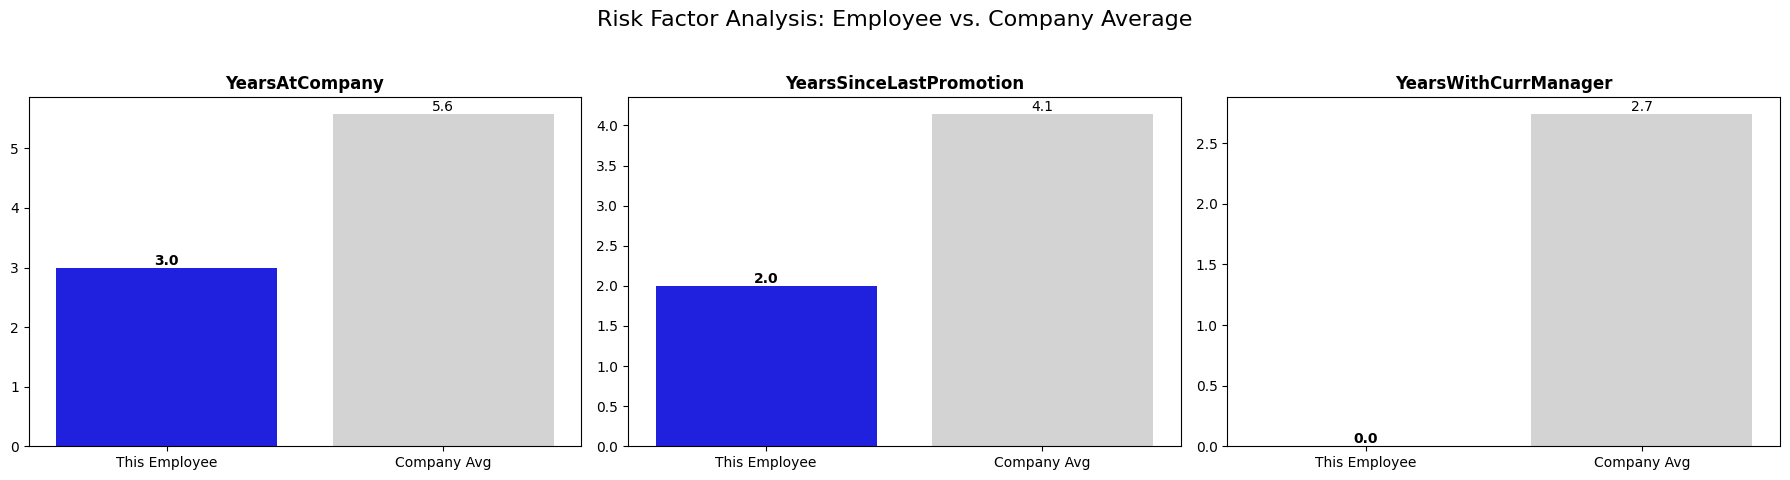

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def predict_employee_dashboard(employee_id):
    # 1. Find the employee
    emp_row = df[df['EmployeeID'] == employee_id]
    if emp_row.empty:
        return f"❌ Employee ID '{employee_id}' not found."

    row_index = emp_row.index[0]
    emp_features = X_encoded.iloc[[row_index]]

    # 2. Get Prediction
    prediction = rf_model.predict(emp_features)[0]
    probability = rf_model.predict_proba(emp_features)[0][1]

    # 3. Get Top 3 Drivers
    importances = pd.Series(rf_model.feature_importances_, index=X_encoded.columns)
    top_3_features = importances.nlargest(3).index.tolist()

    # --- TEXT REPORT ---
    status = "LEAVE" if prediction == 1 else "STAY"
    risk_color = "red" if prediction == 1 else "green"
    print(f"--- 📊 Dashboard for {employee_id} ---")
    print(f"Prediction: {status} (Risk: {probability:.1%})")

    # --- VISUALIZATION ---
    # Create 3 side-by-side charts for the Top 3 Drivers
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    fig.suptitle(f'Risk Factor Analysis: Employee vs. Company Average', fontsize=16)

    for i, feature in enumerate(top_3_features):
        # Get the values
        emp_val = emp_features[feature].values[0]
        comp_avg = df[feature].mean()  # Compare to original data average for context

        # Determine if this feature is a "Risk" (simplified logic for visual color)
        # If employee value is lower than avg for things like Salary, it's bad (Red)
        color = 'grey'
        if feature == 'Salary' and emp_val < comp_avg: color = 'red'
        elif feature == 'YearsAtCompany' and emp_val < 3: color = 'red' # based on your "Cliff" finding
        else: color = 'blue'

        # Plot Bar Chart
        sns.barplot(x=['This Employee', 'Company Avg'], y=[emp_val, comp_avg], ax=axes[i], palette=[color, 'lightgrey'])
        axes[i].set_title(feature, fontsize=12, fontweight='bold')
        axes[i].set_ylabel('')

        # Add text labels on the bars
        axes[i].text(0, emp_val, f'{emp_val:.1f}', ha='center', va='bottom', fontweight='bold')
        axes[i].text(1, comp_avg, f'{comp_avg:.1f}', ha='center', va='bottom')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to make room for title
    plt.show()

# --- Test the Dashboard ---
predict_employee_dashboard('9727-BC84')

# **Model Explanation: How It Works**

1. The Algorithm: Random Forest Classifier
This tool utilizes a Random Forest algorithm, which is an "ensemble" machine learning method. Instead of relying on a single decision process, it builds hundreds of individual "Decision Trees" during training.

The "Forest": Each tree asks a series of Yes/No questions about the data (e.g., "Is Tenure < 2 years?", "Is Salary < Average?").

The Vote: To make a final prediction for a specific employee, the model aggregates the votes from all trees. This "majority rules" approach makes the model highly accurate and resistant to outliers.

2. The Workflow
The predict_employee_dashboard function automates the following steps:

Lookup: It retrieves the specific employee's live data from the HR system (the dataset).

Processing: It formats the data into the exact numerical structure the model was trained on.

Prediction: It calculates two outputs:

Class: LEAVE vs. STAY (The most likely outcome).

Probability: A "Risk Score" (e.g., 97% chance of attrition).

Contextualization: It identifies the Top 3 Drivers (e.g., Low Tenure, Salary Gap) specific to that individual to explain why they are at risk.

3. Primary Risk Drivers
Based on our analysis, the model heavily weighs the following factors when predicting attrition:

Tenure (Years at Company): New hires (0–2 years) are at extreme risk.

Compensation: Large gaps between an employee's salary and the market/company average.

Manager Stability: Employees with new managers are significantly more likely to leave.